# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# add your API key
api_key ="4097a212bd3294173975e28e3e178ec8"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | erdenet
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | buariki
City not found. Skipping...
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | gizo
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | sault sainte marie
Processing Record 15 of Set 1 | davila
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | fairbanks
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | yar-sale
Processing Record 21 of Set 1 | tigil
Processing Record 22 of Set 1 | va

Processing Record 32 of Set 4 | loreto
Processing Record 33 of Set 4 | aykhal
Processing Record 34 of Set 4 | vreed en hoop
City not found. Skipping...
Processing Record 35 of Set 4 | upernavik
Processing Record 36 of Set 4 | tiksi
Processing Record 37 of Set 4 | linxia
Processing Record 38 of Set 4 | viedma
Processing Record 39 of Set 4 | rameshki
Processing Record 40 of Set 4 | siniscola
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | ferrol
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | makakilo city
Processing Record 45 of Set 4 | kailua
Processing Record 46 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | cerrito
Processing Record 49 of Set 4 | lebu
Processing Record 0 of Set 5 | qui nhon
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | samana
Processing Record 3 of Set 5 | ucluelet
Processing Record 4 of Set 5 | bratsk

Processing Record 24 of Set 8 | mwanza
Processing Record 25 of Set 8 | krasnouralsk
Processing Record 26 of Set 8 | pacifica
Processing Record 27 of Set 8 | chiautla
Processing Record 28 of Set 8 | bure
Processing Record 29 of Set 8 | gazli
Processing Record 30 of Set 8 | kargil
Processing Record 31 of Set 8 | stanilesti
Processing Record 32 of Set 8 | arraial do cabo
Processing Record 33 of Set 8 | terra santa
Processing Record 34 of Set 8 | kolvereid
Processing Record 35 of Set 8 | wenling
Processing Record 36 of Set 8 | kars
Processing Record 37 of Set 8 | nuevo progreso
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | petatlan
Processing Record 40 of Set 8 | tazovskiy
Processing Record 41 of Set 8 | takanabe
Processing Record 42 of Set 8 | toucheng
Processing Record 43 of Set 8 | mubende
Processing Record 44 of Set 8 | san jose
Processing Record 45 of Set 8 | necochea
Processing Record 46 of Set 8 | nacogdoches
Processing Record 47 of Set 8 | sistranda
Proce

Processing Record 12 of Set 12 | praxedis guerrero
Processing Record 13 of Set 12 | pocatello
Processing Record 14 of Set 12 | mlonggo
Processing Record 15 of Set 12 | arlit
Processing Record 16 of Set 12 | yulara
Processing Record 17 of Set 12 | chuka
Processing Record 18 of Set 12 | nantucket
Processing Record 19 of Set 12 | glendive
Processing Record 20 of Set 12 | scarborough
Processing Record 21 of Set 12 | srednekolymsk
Processing Record 22 of Set 12 | noumea
Processing Record 23 of Set 12 | ranong
Processing Record 24 of Set 12 | san vicente
Processing Record 25 of Set 12 | gore
Processing Record 26 of Set 12 | whitley bay
Processing Record 27 of Set 12 | puerto madero
Processing Record 28 of Set 12 | solnechnyy
Processing Record 29 of Set 12 | waddan
Processing Record 30 of Set 12 | marica
Processing Record 31 of Set 12 | nagato
Processing Record 32 of Set 12 | natchitoches
Processing Record 33 of Set 12 | bressanone
Processing Record 34 of Set 12 | ekhabi
Processing Record 35 

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,erdenet,49.0333,104.0833,-6.50,99,44,3.85,1675817676
1,albany,42.6001,-73.9662,34.45,77,100,1.01,1675817683
2,tuktoyaktuk,69.4541,-133.0374,-25.60,75,100,3.44,1675817688
3,ushuaia,-54.8000,-68.3000,53.26,50,0,3.44,1675817486
4,cape town,-33.9258,18.4232,69.91,72,0,15.01,1675817465


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

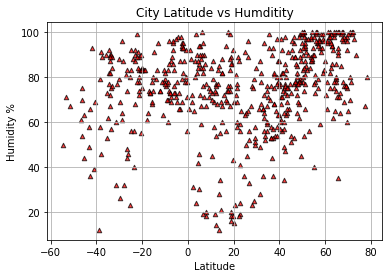

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Humditity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudines %')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)



# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Max Temp vs Latitude',fontsize =20)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('',fontsize =10)


print(f"The r-squared is: {rvalue**2}")

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df = pd.DataFrame(southern_hemi)


# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,20), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(4.5,80), fontsize=15, color='b')
plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,25), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE